In [5]:
from pathlib import Path
import pandas as pd
import numpy as np


In [32]:
# Запишем в переменную path путь к папке с data
path = Path(Path.cwd(), 'data')
path

WindowsPath('C:/Users/alexoxol/Desktop/Обучение/Карпов_АНАЛИТИК_ДАННЫХ/PYTHON/МИНИПРОЕКТЫ/4/data')

### 1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)

In [36]:
def get_data(f, cols):
    '''f - полный путь к файлу'''
    name = f.parent.name
    dt = f.parent.parent.name
    df = pd.read_csv(f)[cols]
    df["name"] = name
    df["date"] = dt
    df["date"] = pd.to_datetime(df["date"])
    return df

In [41]:
df = pd.concat([get_data(f, ['product_id', 'quantity']) for f in path.rglob("*.csv")], sort = False)
df.head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


In [42]:
df.dtypes

product_id             int64
quantity               int64
name                  object
date          datetime64[ns]
dtype: object

### 2.	Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [65]:
task2 = df.groupby("name", as_index=False) \
  .agg({"quantity":sum}) \
  .sort_values(by = "quantity", ascending = False) \

task2["rnk"] = task2['quantity'] \
                    .rank(method = "min", ascending = False)
print(", ".join(list(task2.query("rnk == 1").sort_values(by = "name")['name'])))

Alexey_Smirnov, Petr_Smirnov


### 3.	Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

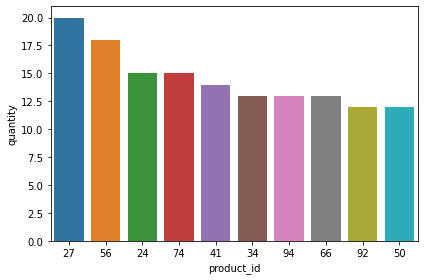

In [95]:
task3 = df.groupby("product_id", as_index=False) \
  .agg({"quantity":sum}) \
  .sort_values(by = "quantity", ascending = False) \
  .head(10) 
sns.barplot(data = task3, x = "product_id", y = "quantity", order = task3.sort_values(by = "quantity", ascending = False)["product_id"])
plt.tight_layout()

In [85]:
print(f"Количество проданных единиц по товару_56 = {task3.query('product_id == 56')['quantity'].values[0]}")

Количество проданных единиц по товару_56 = 18


### 4.	Визуализируйте продажи по дням.

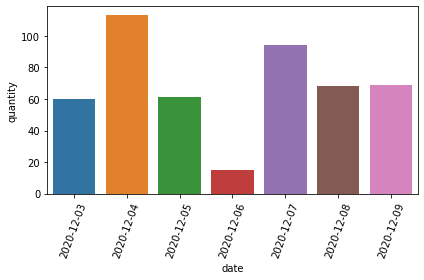

In [94]:
task4 = df.groupby("date", as_index=False) \
  .agg({"quantity":sum}) 
sns.barplot( x = task4["date"].dt.date, y = task4["quantity"]) 
plt.xticks(rotation=70)
plt.tight_layout()

### 5.	Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [100]:
df.groupby(["name", "product_id"], as_index=False) \
  .agg({"date":pd.Series.nunique}) \
  .query("date > 1")

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


In [102]:
df.groupby(["name", "product_id"], as_index=False) \
  .agg({"date":pd.Series.nunique}) \
  .query("date > 1")["name"] \
  .nunique()

2

## Дополнительный проект
И небольшой минипроект на фильтрацию данных!
</br>
Имеется таблица с записями о компаниях, включая их ИНН, и отдельный текстовый файл с набором ИНН (колонка head_inn), которые хранятся в файле 4_inn.
</br>
•	4_inn.xls — таблица в экселевском формате
</br>
•	4_necessary_inn.txt — перечень необходимых ИНН в текстовом формате
</br>
</br>
</br>
Задачи:
</br>
•	извлечь из таблицы записи с ИНН, указанными в текстовом файле
</br>
•	записать результат в файл selected_inn.csv
</br>
•	В качестве проверки укажите сумму колонки income,RUB в отобранных данных.
</br>
•	NB! У набора данных necessary_inn.txt нет заголовка, поэтому вам пригодится аргумент header=None. 


In [106]:
xls = pd.read_excel('4_inn.xls')
xls.head()

,Unnamed: 0,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
0,0,0,"ЗАО «Власова, Макаров и Шашков»",1143692580560,"д. Кирово-Чепецк, пр. Металлургов, д. 537 к. 3...",Жданов Карл Виленович,Маммолог,109092209811,+7 (559) 338-87-76,bogdanovavtonom@yahoo.com,ooo.info,2015-01-07,2006-10-04,21112877268,73423615032,Ulan-Ude,"к. Тосно, ул. Пушкинская, д. 896, 617222",Синхронизация критически важных отношений,54875526078,32205872896
1,1,1,"РАО «Тимофеева, Алексеева и Кузнецова»",9342309660697,"г. Арзамас, наб. Фестивальная, д. 7 стр. 8/2, ...",Рожков Харлампий Алексеевич,Воспитатель,704229465069,8 (632) 620-8879,safonovantonin@rao.org,ooo.net,1990-05-16,2019-01-18,18393547520,19072454279,Tyoply Stan,"ст. Кяхта, бул. Нефтяников, д. 24, 768742",Формирование заказных методик,33876448811,47437574301
2,2,2,РАО «Юдин-Ефимова»,1277485323451,"п. Меренга, алл. Достоевского, д. 3/4 к. 497, ...",Филимон Фадеевич Дьячков,Автослесарь,267655036377,+74925330378,kdorofeev@npo.ru,ao.com,1982-11-04,1986-06-19,56104355836,18629292792,Danilov,"клх Усолье Сибирское, алл. Шишкина, д. 3/9 к. ...",Максимизация корпоративных метрик,94073834991,7701710065
3,3,3,Доронин Инкорпорэйтед,7139161431511,"д. Иваново, ул. Красных Партизан, д. 83 к. 4, ...",Крылов Глеб Якубович,Тюремный надзиратель,362024991175,+7 118 643 21 48,nkulakova@mail.ru,ooo.ru,2005-01-02,2004-04-06,10398489351,32502585383,Beryozovsky,"г. Заводоуковск, ул. Гражданская, д. 7 к. 8/5,...",Разработка ориентированных на пользователя инт...,86971505490,61148002572
4,4,4,Объединенная энергетическая компания,6114798049639,"к. Энгельс, наб. Шишкина, д. 120, 823828",Субботин Вячеслав Федотович,Инженер-электрик,257948948010,8 642 249 2134,evgraf_18@yahoo.com,gerasimova.biz,1983-07-02,1992-06-20,20074507047,40083207999,Bavly,"к. Соль-Илецк, пер. Пригородный, д. 804 к. 1/3...",Монетизация интуитивных веб-сервисов,36351136214,34861533393


In [115]:
xls.dtypes

Unnamed: 0                 int64
#                          int64
name                      object
reg_number                 int64
address                   object
head                      object
head_job                  object
head_inn                   int64
phone                     object
email                     object
site                      object
registration_date         object
nalogoplatelschik_code    object
oktmo_code                 int64
okato_code                 int64
registration_region       object
okato_name                object
field                     object
capital,RUB                int64
income,RUB                 int64
dtype: object

In [118]:
txt = pd.read_csv("4_necessary_inn.txt", header=None).rename(columns = {0:"head_inn"})

txt.head()

,head_inn
0,394609645484
1,281578625230
2,923769811917
3,998694734508
4,271011690615


In [119]:
txt.dtypes

head_inn    int64
dtype: object

In [122]:
selected_inn = xls.merge(txt, on = "head_inn", how = "inner")
selected_inn.to_csv("selected_inn.csv", index = False)

In [125]:
selected_inn['income,RUB'].sum()


6104522627393